# Data Analyzis from DES

## Setup Collab

In [1]:
! pip install healpy 

     |████████████████████████████████| 15.8MB 300kB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import healpy as hp
import os
import matplotlib
from astropy.io import ascii 
from astropy.table import Table,QTable
import astropy.io.fits as fits
import astropy

%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
filename = os.listdir("/content/drive/My Drive/DES analysis/FITS/64")  
l = []

In [9]:
for i in range(int(len((filename))/2-50)):
    path = os.path.join("/content/drive/My Drive/DES analysis/FITS/64",filename[i])
    df = Table.read(path).to_pandas()
    l.append(df)

In [10]:
des = pd.concat(l, axis=0, ignore_index=True)

In [11]:
del l
del df

Some info about the dataset that was load

In [12]:
des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342206 entries, 0 to 2342205
Columns: 213 entries, COADD_OBJECT_ID to WAVG_SPREADERR_MODEL_Y
dtypes: float64(181), int64(31), object(1)
memory usage: 3.7+ GB


In [13]:
des.columns

Index(['COADD_OBJECT_ID', 'TILENAME', 'HPIX_32', 'HPIX_64', 'HPIX_1024',
       'HPIX_4096', 'HPIX_16384', 'RA', 'DEC', 'ALPHAWIN_J2000',
       ...
       'SPREADERR_MODEL_G', 'SPREADERR_MODEL_R', 'SPREADERR_MODEL_I',
       'SPREADERR_MODEL_Z', 'SPREADERR_MODEL_Y', 'WAVG_SPREADERR_MODEL_G',
       'WAVG_SPREADERR_MODEL_R', 'WAVG_SPREADERR_MODEL_I',
       'WAVG_SPREADERR_MODEL_Z', 'WAVG_SPREADERR_MODEL_Y'],
      dtype='object', length=213)

In [14]:
des.head()

,COADD_OBJECT_ID,TILENAME,HPIX_32,HPIX_64,HPIX_1024,HPIX_4096,HPIX_16384,RA,DEC,ALPHAWIN_J2000,DELTAWIN_J2000,GALACTIC_L,GALACTIC_B,XWIN_IMAGE,YWIN_IMAGE,A_IMAGE,ERRA_IMAGE,B_IMAGE,ERRB_IMAGE,THETA_J2000,ERRTHETA_IMAGE,KRON_RADIUS,EBV_SFD98,MAG_AUTO_G_DERED,MAG_AUTO_R_DERED,MAG_AUTO_I_DERED,MAG_AUTO_Z_DERED,MAG_AUTO_Y_DERED,WAVG_MAG_PSF_G_DERED,WAVG_MAG_PSF_R_DERED,WAVG_MAG_PSF_I_DERED,WAVG_MAG_PSF_Z_DERED,WAVG_MAG_PSF_Y_DERED,FLAGS_G,IMAFLAGS_ISO_G,NEPOCHS_G,FLAGS_R,IMAFLAGS_ISO_R,NEPOCHS_R,FLAGS_I,...,FLUXERR_AUTO_G,FLUXERR_AUTO_R,FLUXERR_AUTO_I,FLUXERR_AUTO_Z,FLUXERR_AUTO_Y,WAVG_FLUX_PSF_G,WAVG_FLUX_PSF_R,WAVG_FLUX_PSF_I,WAVG_FLUX_PSF_Z,WAVG_FLUX_PSF_Y,WAVG_FLUXERR_PSF_G,WAVG_FLUXERR_PSF_R,WAVG_FLUXERR_PSF_I,WAVG_FLUXERR_PSF_Z,WAVG_FLUXERR_PSF_Y,CLASS_STAR_G,CLASS_STAR_R,CLASS_STAR_I,CLASS_STAR_Z,CLASS_STAR_Y,SPREAD_MODEL_G,SPREAD_MODEL_R,SPREAD_MODEL_I,SPREAD_MODEL_Z,SPREAD_MODEL_Y,WAVG_SPREAD_MODEL_G,WAVG_SPREAD_MODEL_R,WAVG_SPREAD_MODEL_I,WAVG_SPREAD_MODEL_Z,WAVG_SPREAD_MODEL_Y,SPREADERR_MODEL_G,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y
0,350579741,b'DES0120+0209',4551,18207,4661248,74579968,1193279488,19.687599,2.391029,19.687599,2.391029,136.572708,-59.755405,9494.195585,8186.251386,1.712758,0.109921,1.567986,0.095501,22.048882,-72.441795,4.796509,0.03146,26.067598,23.729120,22.495396,22.268257,21.366774,98.899765,98.932678,22.642881,22.228052,98.967033,0,0,0,0,0,0,0,...,37.593143,61.190342,98.272835,203.128647,569.153137,-99.000000,-99.000000,837.728577,1240.876465,-99.0,-99.000000,-99.000000,47.480026,119.597206,-99.0,0.031906,0.051348,0.100288,0.528843,0.641438,0.006069,0.001336,0.009863,0.004833,-0.001660,-99.000000,-99.000000,0.008617,0.004551,-99.0,0.014825,0.004928,0.002385,0.003084,0.008823,-99.000000,-99.000000,0.002451,0.003898,-99.0
1,350579834,b'DES0120+0209',4551,18207,4661248,74579968,1193279488,19.686087,2.389279,19.686087,2.389279,136.570496,-59.757431,9514.880006,8162.300801,2.273781,0.150941,1.504220,0.095502,-20.308624,69.970505,5.395504,0.03144,23.099276,23.007767,22.649191,22.416691,22.929346,23.128410,23.086435,22.875910,22.611147,98.967049,0,0,4,0,0,3,0,...,50.421570,80.982254,123.989319,256.015411,717.350708,511.173798,547.662781,675.933655,871.968384,-99.0,26.618544,35.645817,58.583202,127.944092,-99.0,0.025791,0.151877,0.077842,0.241505,0.417320,0.003687,0.002667,0.007761,-0.001310,0.023424,0.003019,0.000506,0.002870,-0.001404,-99.0,0.002205,0.002854,0.002947,0.004257,0.026188,0.002033,0.002684,0.003215,0.005703,-99.0
2,178163224,b'DES0009+0500',4871,19484,4988056,79808910,1276942567,2.544590,5.361730,2.544590,5.361730,104.334641,-56.013042,3425.012140,9762.023339,2.346899,0.182910,1.782968,0.138829,0.780342,-88.537437,6.251368,0.02618,22.651640,21.829609,21.361893,21.313887,98.972565,98.916588,23.248329,22.754902,98.968689,98.972565,0,0,0,0,0,1,0,...,110.013512,188.428513,396.696777,564.394226,0.000000,-99.000000,476.714569,761.392334,-99.000000,-99.0,-99.000000,55.781193,111.249016,-99.000000,-99.0,0.089858,0.053350,0.488403,0.007676,0.047411,0.020845,0.027653,0.026137,0.018311,0.000000,-99.000000,0.028698,0.019076,-99.000000,-99.0,0.006437,0.005730,0.006364,0.005101,0.000000,-99.000000,0.006103,0.006016,-99.000000,-99.0
3,178163229,b'DES0009+0500',4871,19484,4988058,79808930,1276942890,2.485953,5.360803,2.485953,5.360803,104.234108,-55.997242,4224.147426,9749.222443,2.053002,0.136178,1.547234,0.104683,28.763054,-64.370377,5.768880,0.02654,22.622866,22.203459,21.679764,22.725224,98.972183,23.224955,22.517225,22.087029,98.968262,98.972183,0,0,1,0,0,1,0,...,98.716972,151.479691,318.201599,591.312073,0.000000,474.455658,934.096497,1407.771484,-99.000000,-99.0,54.465172,56.426243,106.132065,-99.000000,-99.0,0.104702,0.022049,0.077091,0.077314,0.019273,0.009881,0.011414,0.009519,0.015174,0.000000,0.003712,0.011363,0.008417,-99.000000,-99.0,0.003439,0.002

## Plots

Text(0, 0.5, 'DEC')

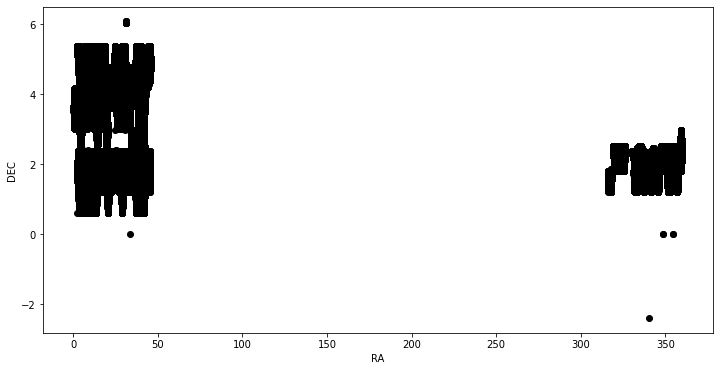

In [15]:
plt.figure(figsize=(12,6))
plt.plot(des['RA'],des['DEC'],'ko')
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.xlim(0,50)
#plt.ylim(-5,5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

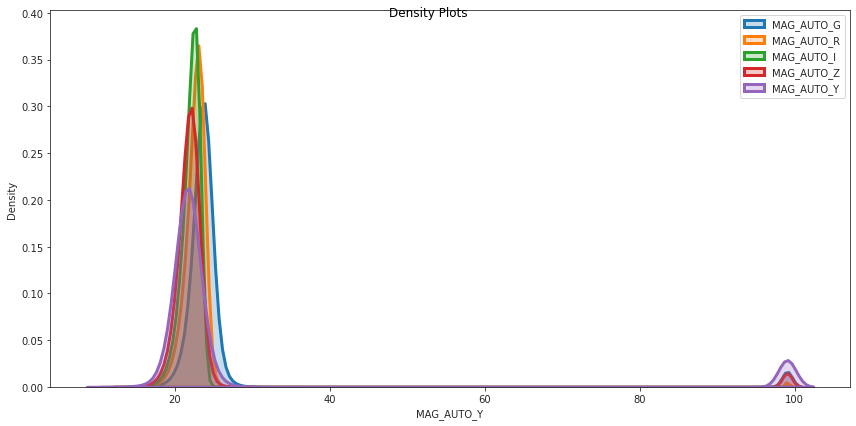

In [16]:
features = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y']

plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(des[features[j]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


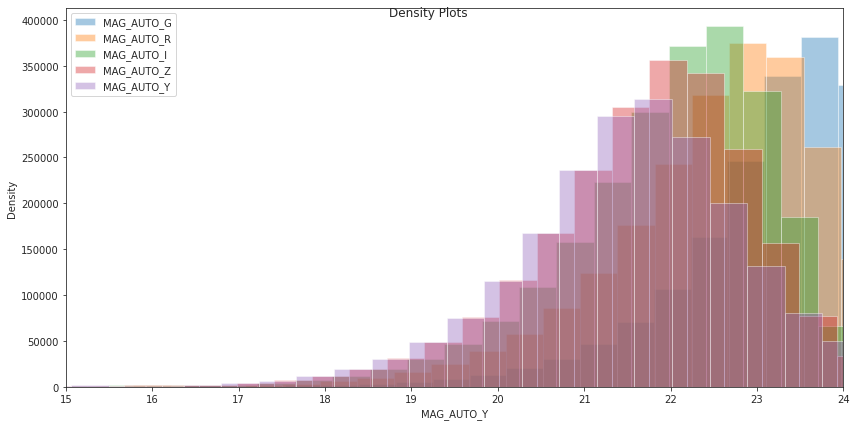

In [17]:
plt.figure(figsize=(12,6))
plt.suptitle('Density Plots')
sns.set_style("ticks")
for j in range(len(features)):
    sns.distplot(des[features[j]], hist = True,bins=200, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = features[j])
    plt.legend()
    plt.xlabel(features[j])
    plt.ylabel('Density')
plt.xlim(15,24)
plt.tight_layout()


Text(0, 0.5, 'G-R')

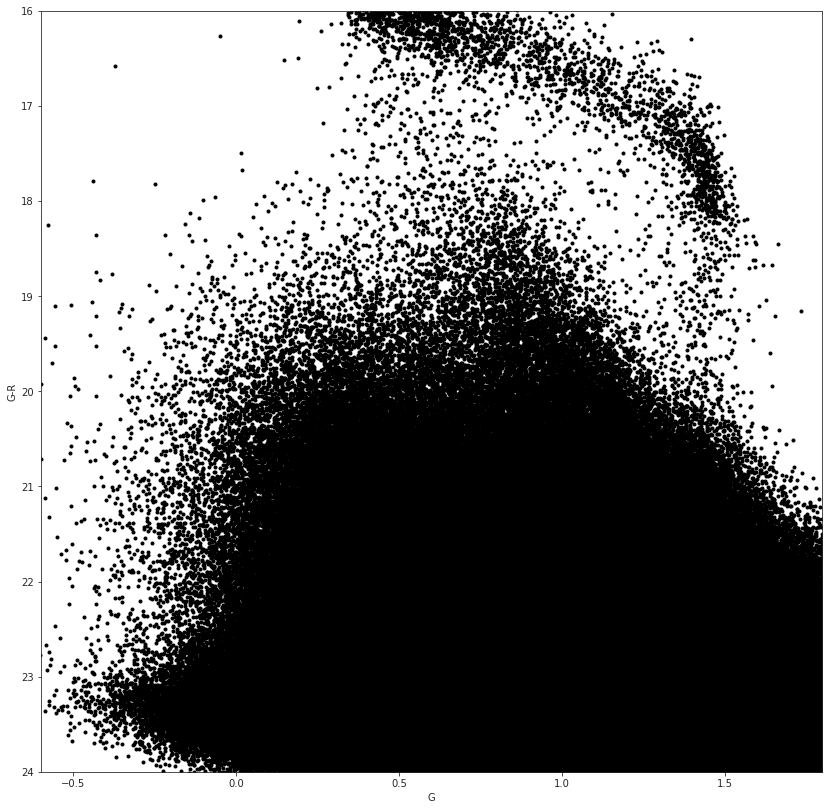

In [18]:
plt.figure(figsize=(14,14))
plt.plot(des.WAVG_MAG_PSF_G-des.WAVG_MAG_PSF_R,des.WAVG_MAG_PSF_G,'k.')
plt.xlim(-0.6,1.8)
plt.ylim(24,16)
plt.xlabel('G')
plt.ylabel('G-R')

Text(0, 0.5, 'R-I')

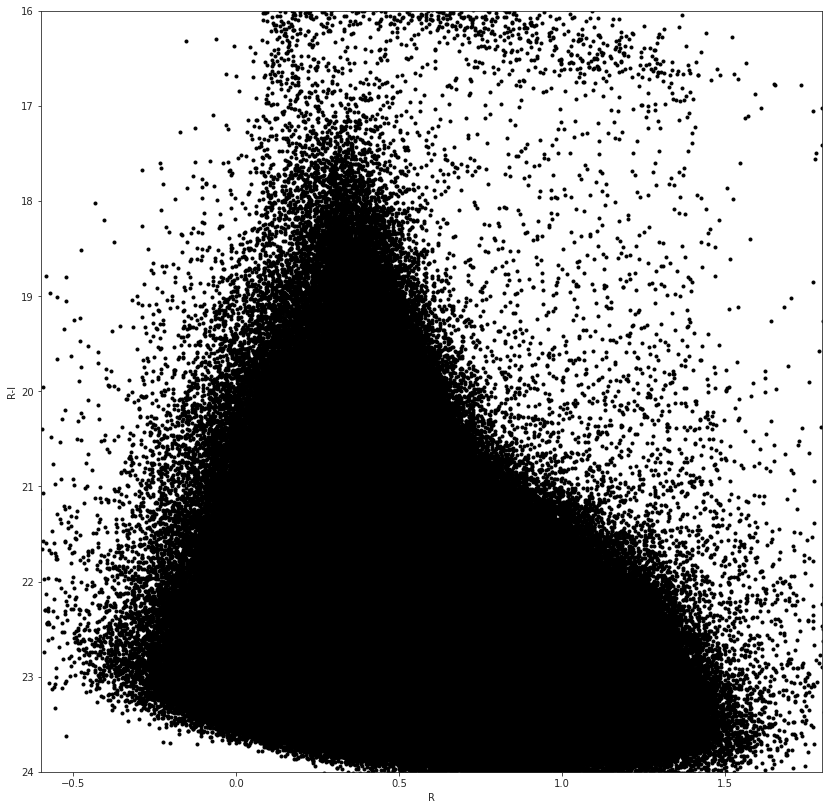

In [19]:
plt.figure(figsize=(14,14))
plt.plot(des.WAVG_MAG_PSF_R-des.WAVG_MAG_PSF_I,des.WAVG_MAG_PSF_R,'k.')
plt.xlim(-0.6,1.8)
plt.ylim(24,16)
plt.xlabel('R')
plt.ylabel('R-I')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


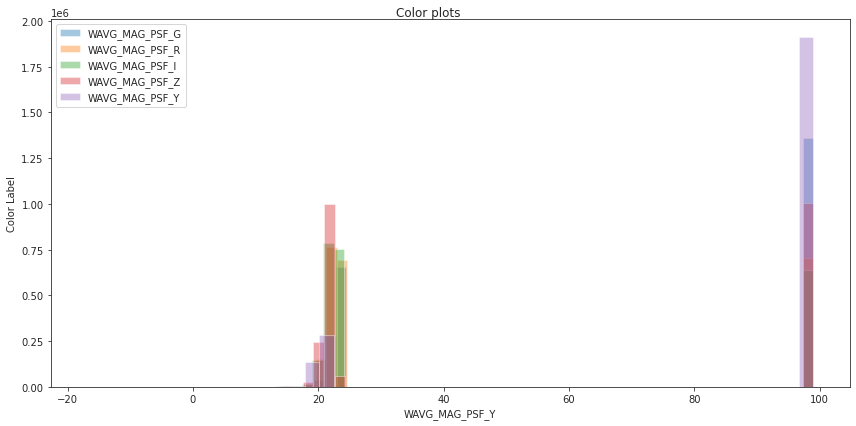

In [20]:
features2 = ['WAVG_MAG_PSF_G','WAVG_MAG_PSF_R','WAVG_MAG_PSF_I','WAVG_MAG_PSF_Z','WAVG_MAG_PSF_Y']
plt.figure(figsize=(12,6))
plt.suptitle('Color plots')
sns.set_style("ticks")
for j in range(len(features2)):
    sns.distplot(des[features2[j]], hist = True, kde = False, kde_kws = {'shade': True, 'linewidth': 3}, label = features2[j])
    plt.legend()
    plt.xlabel(features2[j])
    plt.ylabel('Color Label')
plt.tight_layout()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

IndexError: ignored

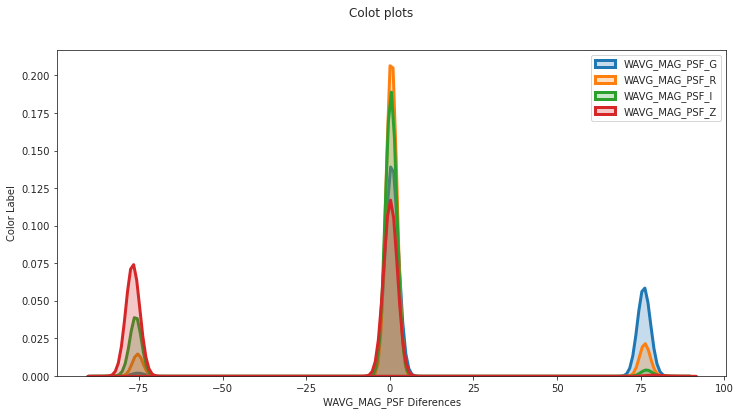

In [21]:
features2 = ['WAVG_MAG_PSF_G','WAVG_MAG_PSF_R','WAVG_MAG_PSF_I','WAVG_MAG_PSF_Z','WAVG_MAG_PSF_Y']
plt.figure(figsize=(12,6))
plt.suptitle('Colot plots')
sns.set_style("ticks")
for j in range(len(features2)):
    sns.distplot(des[features2[j]]-des[features2[j+1]], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = features2[j])
    plt.legend()
    plt.xlabel('WAVG_MAG_PSF Diferences')
    plt.ylabel('Color Label')
plt.tight_layout()


In [22]:
# do some plots
X, Y = np.mgrid[17:27:70j, 17:27:70j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([des.MAG_AUTO_R, des.MAG_AUTO_I])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

Text(0, 0.5, 'MAG_AUTO_I')

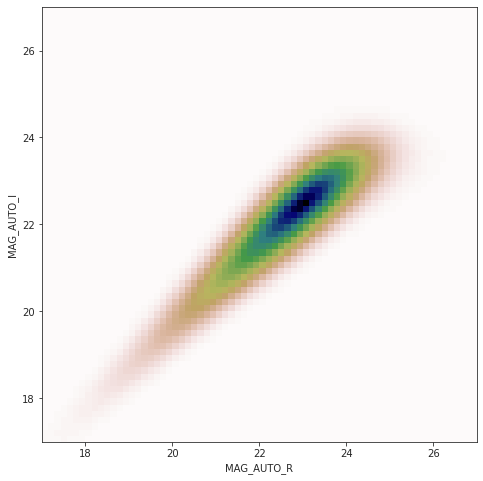

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[17, 27, 17, 27])
plt.xlabel('MAG_AUTO_R')
plt.ylabel('MAG_AUTO_I')